<IPython.core.display.Javascript object>


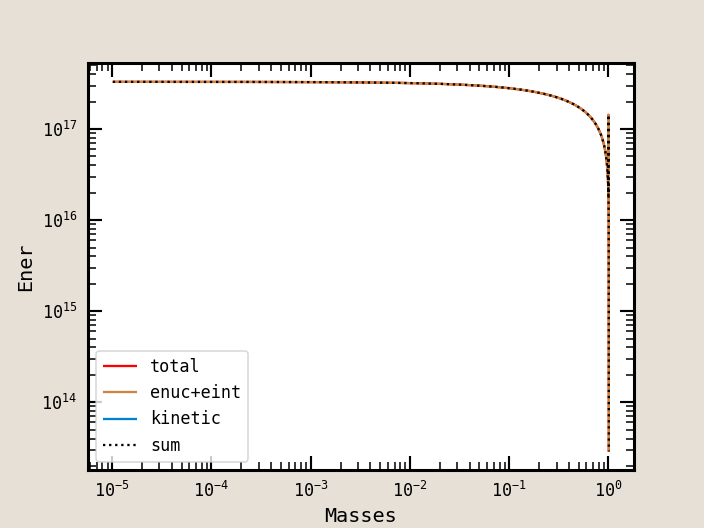

In [7]:
from flashy.datahaul.hdfdirect import getUNK
import matplotlib.pyplot as plt
import flashy.plot.oneDim as oned
file = '../fruns.one/snia_doubledetonation/SN231.spherical.16cells.512maxb/fs_m1029_sh80_ring4737_ms12_t1.0/chk/flash_hdf5_chk_0000'
bulknames, species = getUNK(file)  # list of values to pick
flist =  ['eint', 'shok', 'ener', 'enuc', 'velx']  # picked values
time, pars, paths, dmatr = oned.fetchData(file, direction=[], 
                                      fields=['density']+flist)
%matplotlib notebook
f, ax = plt.subplots()
# plot by keyword
oned.simplePlot(ax, dmatr, 'masses', 'ener', log=True, color='r',  label='total')
kin = 0.5*dmatr.velx*dmatr.velx
# plot by dataMatrix property
ax.loglog(dmatr.masses, dmatr.enuc+dmatr.eint, label='enuc+eint', color='peru')
ax.loglog(dmatr.masses, kin, label='kinetic')
ax.loglog(dmatr.masses, dmatr.enuc+dmatr.eint+kin, ls=':', label='sum', color='k')
lg = ax.legend()

In [8]:
# pick another file to compare
file2 = '../fruns.one/snia_doubledetonation/SN231.spherical.16cells.512maxb/fs_m1029_sh80_ring4737_ms12_t1.0/chk/flash_hdf5_chk_0010'
flist2 =  ['eint', 'shok', 'ener', 'enuc', 'velx']  # picked values
time2, pars2, paths2, dmatr2 = oned.fetchData(file2, direction=[], 
                                      fields=['density']+flist2)

In [10]:
from flashy.utils import percentDiff

In [15]:
pdiff = percentDiff(dmatr.radius, dmatr.dens, dmatr2.radius, dmatr2.dens)

<IPython.core.display.Javascript object>


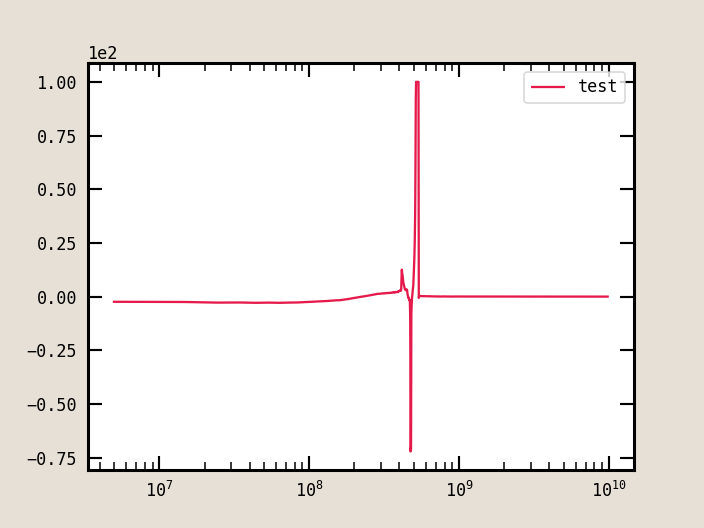

In [17]:
f2, ax2 = plt.subplots()
ax2.semilogx(dmatr.radius, np.clip(pdiff, -100, 100), label='test')
leg = ax2.legend()